In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import os
from sklearn.model_selection import train_test_split
import numpy as np
from pandas import datetime

# FORECAST

#### PER OUTLET

In [0]:
ser = pd.read_csv('../content/drive/My Drive/dataset/dataset_forecast.csv', sep=';')
ser['period'] = pd.to_datetime(ser['period'], format='%Y%m')
ser.head()

In [0]:
prd = ser.loc[ser['site_use_id']=='SS32HD']
prd['period'].min(),prd['period'].max() 

In [0]:
col = ['site_use_id']
prd = prd.drop(col, axis=1)
prd = prd.set_index('period')
prd.index

In [0]:
prd = prd.reset_index()
prd.columns = ['ds','y']
prd.tail()

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.title('Data Aktual')
ax = sns.lineplot(x="ds", y="y", data=prd)

In [0]:
X_train = prd[:27]
X_train.tail()

In [0]:
from fbprophet import Prophet

model = Prophet()
model.fit(X_train)
fore = model.make_future_dataframe(periods=2, freq='MS')
forecast = model.predict(fore)

forecast.tail()

In [0]:
metric_df = forecast.set_index('ds')[['yhat']].join(prd.set_index('ds').y).reset_index()
metric_df.tail()

In [0]:
plt.title('Data Predict')
ax = sns.lineplot(x="ds", y="yhat", data=forecast)

#### SEMUA OUTLET

In [0]:
series = pd.read_csv('../content/drive/My Drive/dataset/dataset_forecast.csv', sep=';')
series.head()

,site_use_id,period,total_unit
0,SS32HD,201701,0
1,SS32HD,201702,0
2,SS32HD,201703,0
3,SS32HD,201704,60
4,SS32HD,201705,280


In [0]:
ser = pd.read_csv('../content/drive/My Drive/dataset/dataset_forecast.csv', sep=';')
ser['period'] = pd.to_datetime(ser['period'], format='%Y%m')
ser.head()

,site_use_id,period,total_unit
0,SS32HD,2017-01-01,0
1,SS32HD,2017-02-01,0
2,SS32HD,2017-03-01,0
3,SS32HD,2017-04-01,60
4,SS32HD,2017-05-01,280


In [0]:
for index, row in series.iterrows():
    if row['period'] == 201904:
        series.drop(index, inplace=True)

series.head()

,site_use_id,period,total_unit
0,SS32HD,201701,0
1,SS32HD,201702,0
2,SS32HD,201703,0
3,SS32HD,201704,60
4,SS32HD,201705,280


In [0]:
series['period'] = pd.to_datetime(series['period'], format='%Y%m')
series.head()

,site_use_id,period,total_unit
0,SS32HD,2017-01-01,0
1,SS32HD,2017-02-01,0
2,SS32HD,2017-03-01,0
3,SS32HD,2017-04-01,60
4,SS32HD,2017-05-01,280


In [0]:
satu = series[0:270] #10 outlet
satu.tail()

,site_use_id,period,total_unit
274,XH72BP,2018-11-01,20
275,XH72BP,2018-12-01,0
276,XH72BP,2019-01-01,40
277,XH72BP,2019-02-01,0
278,XH72BP,2019-03-01,0


In [0]:
from fbprophet import Prophet

prediction = {}
df = satu.rename(columns={'period': 'ds','total_unit': 'y', 'site_use_id': 'produk'})
list_articles = df.produk.unique()

for article in list_articles:
    article_df = df.loc[df['produk'] == article]
    # set the uncertainty interval to 95% (the Prophet default is 80%)
    my_model = Prophet()
    my_model.fit(article_df)
    future_dates = my_model.make_future_dataframe(periods=2, freq='MS')
    forecast = my_model.predict(future_dates)
    prediction[article] = forecast.yhat

In [0]:
from google.colab import files

df_pr = pd.DataFrame.from_dict(prediction)
df_pr.to_excel('prediction.xls')
files.download("prediction.xls")

In [0]:
my_model.plot(forecast)

# VISUALISASI

#### PROPHET

In [0]:
series = pd.read_csv('../content/drive/My Drive/datasets/dataset_prophet.csv', sep=';')
series.head()

,site_use_id,period,total_unit,yhat
0,SS32HD,201701.0,0.0,69.329328
1,SS32HD,201702.0,0.0,-3.577937
2,SS32HD,201703.0,0.0,35.797229
3,SS32HD,201704.0,60.0,82.347171
4,SS32HD,201705.0,280.0,286.751202


In [0]:
series['period'] = pd.to_datetime(series['period'], format='%Y%m')
series.head()

,site_use_id,period,total_unit,yhat
0,SS32HD,2017-01-01,0.0,69.329328
1,SS32HD,2017-02-01,0.0,-3.577937
2,SS32HD,2017-03-01,0.0,35.797229
3,SS32HD,2017-04-01,60.0,82.347171
4,SS32HD,2017-05-01,280.0,286.751202


In [0]:
ser = series.groupby(['period']).mean()
ser

,total_unit,yhat
period,,
2017-01-01,501.3550,511.925448
2017-02-01,579.3790,590.728667
2017-03-01,691.4500,719.887495
2017-04-01,601.9905,611.594078
2017-05-01,618.9570,622.524956
2017-06-01,499.4580,494.438682
2017-07-01,523.2805,514.537644
2017-08-01,774.7775,761.539049
2017-09-01,644.7855,633.179841


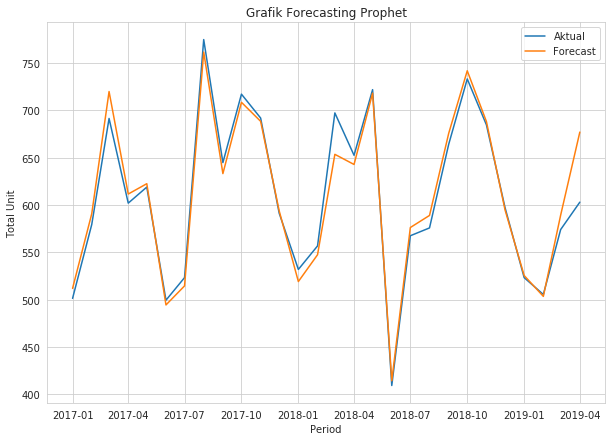

In [0]:
plt.rcParams['figure.figsize'] = (10,7)

plt.plot(ser.total_unit['2017-01-01':'2019-04-01'], label='Aktual')
plt.plot(ser.yhat['2017-01-01':'2019-04-01'], label='Forecast')
plt.title("Grafik Forecasting Prophet")
plt.xlabel('Period')
plt.ylabel('Total Unit')
plt.legend()
plt.show()

#### PROPHET PER OUTLET

In [0]:
def lineplot(x_data, x_data2, x_label="Period", y_label="Total Unit", title="Grafik Forecast Outlet Kalbe", label1="Aktual", label2="Forecast"):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, color = '#539caf', label=label1)
    ax.plot(x_data2, color = '#7663b0', label=label2)

    # Label the axes and provide a title
    plt.rcParams['figure.figsize'] = (10,7)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()

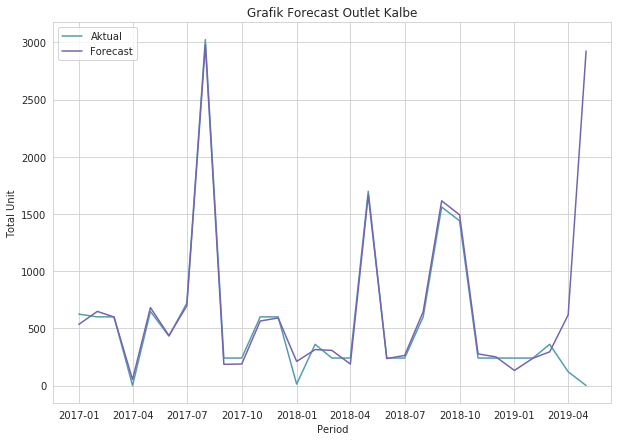

In [0]:
ser2 = series.loc[series['site_use_id']=='XP83RK']
seri2 = ser2.groupby(['period']).sum()

a = lineplot(seri2.total_unit, seri2.yhat)

#### PREPROCESSING PROPHET

In [0]:
seri = pd.read_csv('../content/drive/My Drive/datasets/dataset_preprophet.csv', sep=';')
seri.head()

,site_use_id,period,y_scaler,yhat_scaler
0,SS32HD,201701.0,0.000000,0.000705
1,SS32HD,201702.0,0.000000,-0.000076
2,SS32HD,201703.0,0.000000,0.000293
3,SS32HD,201704.0,0.000609,0.001155
4,SS32HD,201705.0,0.002842,0.002811


In [0]:
seri['period'] = pd.to_datetime(seri['period'], format='%Y%m')
seri.head()

,site_use_id,period,y_scaler,yhat_scaler
0,SS32HD,2017-01-01,0.000000,0.000705
1,SS32HD,2017-02-01,0.000000,-0.000076
2,SS32HD,2017-03-01,0.000000,0.000293
3,SS32HD,2017-04-01,0.000609,0.001155
4,SS32HD,2017-05-01,0.002842,0.002811


In [0]:
seri1 = seri.groupby(['period']).mean()
seri1

,y_scaler,yhat_scaler
period,,
2017-01-01,0.005089,0.005197
2017-02-01,0.005881,0.005983
2017-03-01,0.007019,0.007284
2017-04-01,0.006111,0.006310
2017-05-01,0.006283,0.006289
2017-06-01,0.005070,0.005004
2017-07-01,0.005312,0.005227
2017-08-01,0.007864,0.007750
2017-09-01,0.006545,0.006465


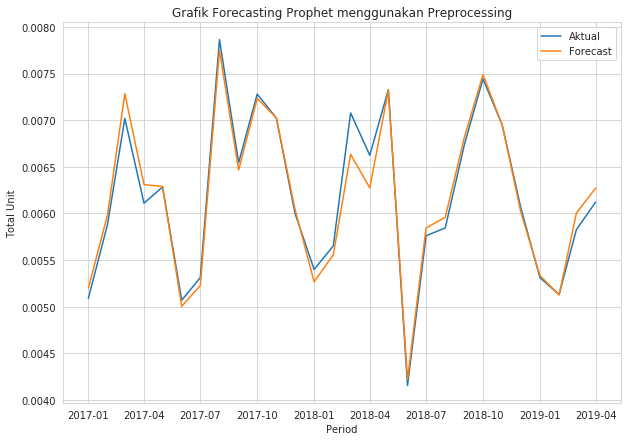

In [0]:
plt.rcParams['figure.figsize'] = (10,7)

plt.plot(seri1.y_scaler['2017-01-01':'2019-04-01'], label='Aktual')
plt.plot(seri1.yhat_scaler['2017-01-01':'2019-04-01'], label='Forecast')
plt.title("Grafik Forecasting Prophet menggunakan Preprocessing")
plt.xlabel('Period')
plt.ylabel('Total Unit')
plt.legend()
plt.show()

#### PROPHET PROCESSING PER OUTLET

In [0]:
def lineplot(x_data, x_data2, x_label="Period", y_label="Total Unit", title="Grafik Forecast Outlet Kalbe", label1="Aktual", label2="Forecast"):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, color = '#539caf', label=label1)
    ax.plot(x_data2, color = '#7663b0', label=label2)

    # Label the axes and provide a title
    plt.rcParams['figure.figsize'] = (10,7)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()

In [0]:
ser2 = seri.loc[seri['site_use_id']=='XP83RK']
seri2 = ser2.groupby(['period']).sum()

a = lineplot(seri2.total_unit, seri2.yhat)

#### AKURASI TERBAIK (PROPHET)

In [190]:
series = pd.read_csv('../content/drive/My Drive/datasets/prophet.csv', sep=';')
series.head()

,site_use_id,period,total_unit,yhat,acc
0,SS32HD,201701.0,0.0,69.329328,0.000000
1,SS32HD,201702.0,0.0,-3.577937,0.000000
2,SS32HD,201703.0,0.0,35.797229,0.000000
3,SS32HD,201704.0,60.0,82.347171,0.627547
4,SS32HD,201705.0,280.0,286.751202,0.975889


In [191]:
for index, row in series.iterrows():
    if row['period'] == 201905:
        series.drop(index, inplace=True)

series.head()

,site_use_id,period,total_unit,yhat,acc
0,SS32HD,201701.0,0.0,69.329328,0.000000
1,SS32HD,201702.0,0.0,-3.577937,0.000000
2,SS32HD,201703.0,0.0,35.797229,0.000000
3,SS32HD,201704.0,60.0,82.347171,0.627547
4,SS32HD,201705.0,280.0,286.751202,0.975889


In [192]:
series['period'] = pd.to_datetime(series['period'], format='%Y%m')
series.head()

,site_use_id,period,total_unit,yhat,acc
0,SS32HD,2017-01-01,0.0,69.329328,0.000000
1,SS32HD,2017-02-01,0.0,-3.577937,0.000000
2,SS32HD,2017-03-01,0.0,35.797229,0.000000
3,SS32HD,2017-04-01,60.0,82.347171,0.627547
4,SS32HD,2017-05-01,280.0,286.751202,0.975889


In [0]:
accs = []
outlet = []

for out in series['site_use_id'].unique() :
  data = series[series.site_use_id == out]
  accu = data.acc.mean()
  outlet.append(out)
  accs.append(accu)

In [194]:
mean = {'mean_accuracy' : accs, 'site_use_id': outlet}
mean_a = pd.DataFrame(mean)
mean_a

,mean_accuracy,site_use_id
0,0.021827,SS32HD
1,0.132653,XP83RK
2,-4.485209,MQ84EY
3,0.710097,ZX72DB
4,-1.449849,WH14HA
...,...,...
1996,0.653908,CS72VA
1997,0.725211,IM68GK
1998,0.798790,MR14LO
1999,0.550774,BI65SI


In [195]:
mean_a.max()

mean_accuracy    0.977733
dtype: float64

In [196]:
mean_a.min()

mean_accuracy   -47.491128
dtype: float64

#### AKURASI TERBAIK (PROPHET PREPROCESSING)

In [181]:
series = pd.read_csv('../content/drive/My Drive/datasets/prophet_preprocessing.csv', sep=';')
series.head()

,site_use_id,period,y_scaler,yhat_scaler,acc
0,SS32HD,2017-01-01 00:00:00,0.000000,0.000705,0.000000
1,SS32HD,2017-02-01 00:00:00,0.000000,-0.000076,0.000000
2,SS32HD,2017-03-01 00:00:00,0.000000,0.000293,0.000000
3,SS32HD,2017-04-01 00:00:00,0.000609,0.001155,0.103720
4,SS32HD,2017-05-01 00:00:00,0.002842,0.002811,0.989037


In [0]:
accs = []
outlet = []

for out in series['site_use_id'].unique() :
  data = series[series.site_use_id == out]
  accu = data.acc.mean()
  outlet.append(out)
  accs.append(accu)

In [183]:
mean = {'mean_accuracy' : accs, 'site_use_id': outlet}
mean_a = pd.DataFrame(mean)
mean_a

,mean_accuracy,site_use_id
0,0.275010,SS32HD
1,0.171226,XP83RK
2,-3.746288,MQ84EY
3,0.684412,ZX72DB
4,-1.913857,WH14HA
...,...,...
1996,0.646530,CS72VA
1997,0.708784,IM68GK
1998,0.777113,MR14LO
1999,0.473010,BI65SI


In [184]:
mean_a.max()

mean_accuracy    0.949906
dtype: float64

In [185]:
mean_a.min()

mean_accuracy   -52.306827
dtype: float64